<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Projeto
Caderno de informações

Professora: [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

Aluno: [Raul Pichinin](https://www.linkedin.com/in/raulpichinin/)

# **Exploração e análise de dados de crédito com SQL**

A análise exploratória de dados envolve a exploração dos dados em busca de insights e padrões que possam ser usados para formular novas hipóteses e direcionar a análise posterior. Esta atividade faz parte do módulo de SQL para o curso análista de dados da EBAC.

# **Sobre os dados:**

**Os dados representam informações de clientes de um banco** e contam com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

Obs: A base de dados do link acima contém mais linhas do que o a análise apresentada. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo se torna interessante.

# **Compreendendo os dados:**
A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

* Qual a quantidade de linhas temos na nossa base de dados?

**Query**: SELECT count(*) FROM credito

Reposta: **2564 linhas**





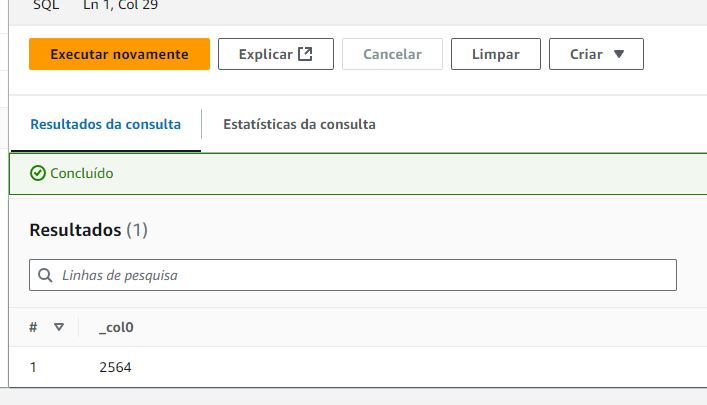

* Como estão formatados estes dados?

**Query**: SELECT * FROM credito LIMIT 10;

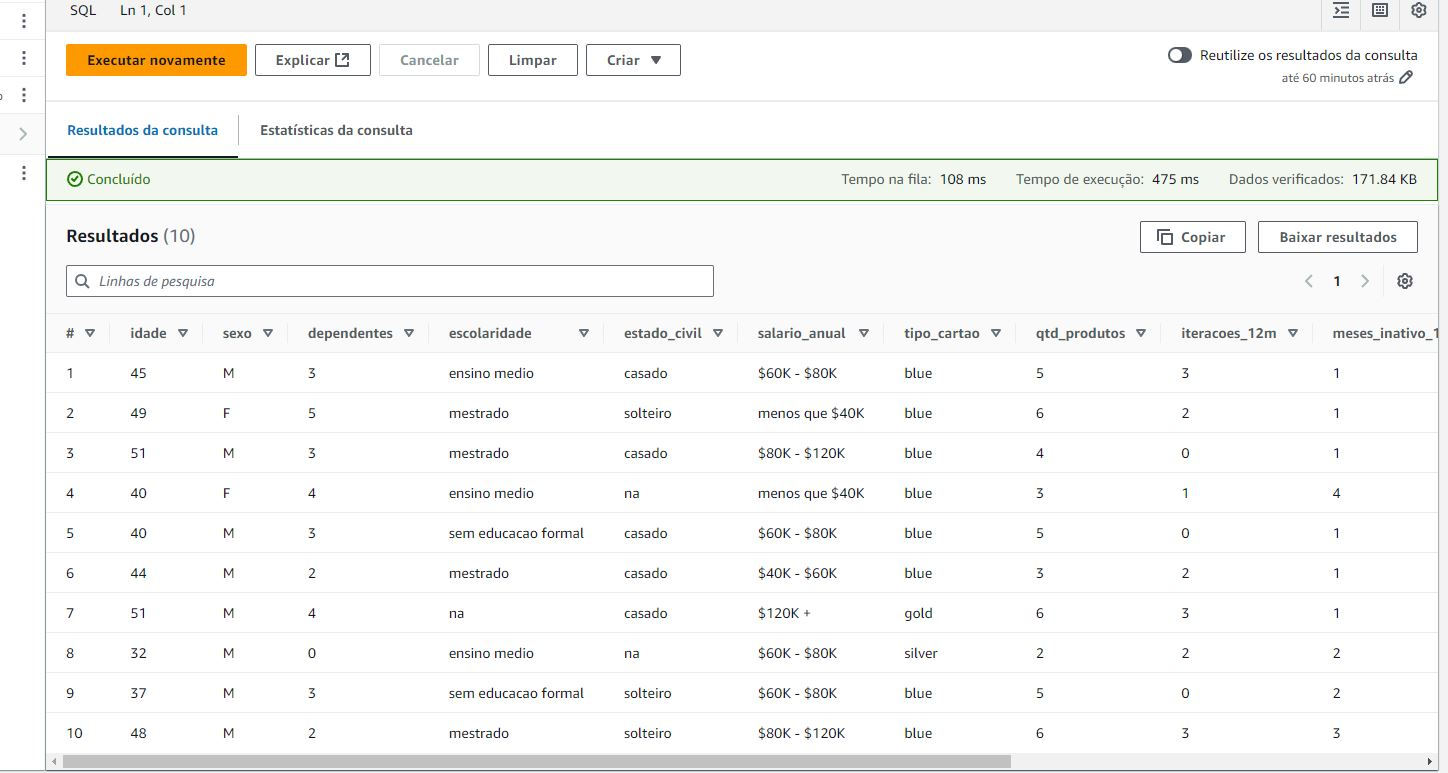

**Obs:** É possível ver alguns valores nulos (na) em mais de uma coluna na base da dados.

* Quais os tipos dos dados de cada coluna?

**Query**: DESCRIBE credito;

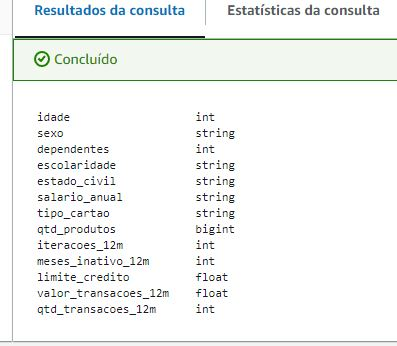

* Quantos tipos diferentes de escolaridade existem no dataset?

 **Query:** SELECT DISTINCT escolaridade FROM credito;



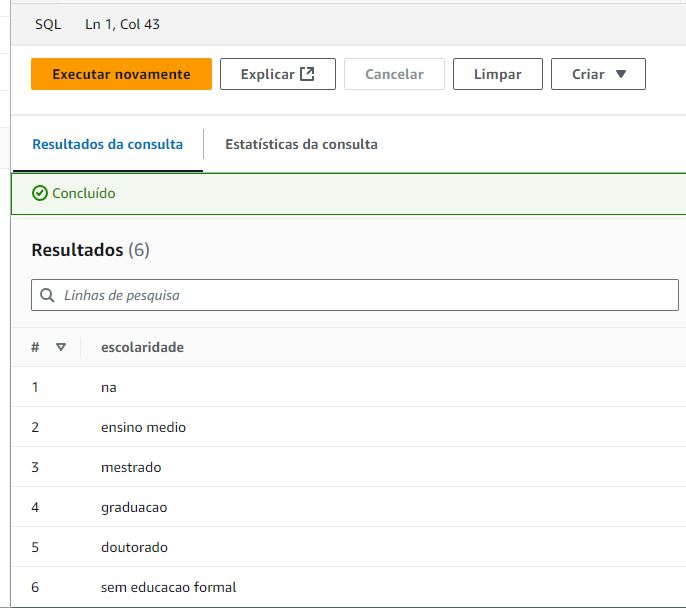

* Quais são os tipos de estado civil disponíveis?

 **Query:** SELECT DISTINCT estado_civil FROM credito;

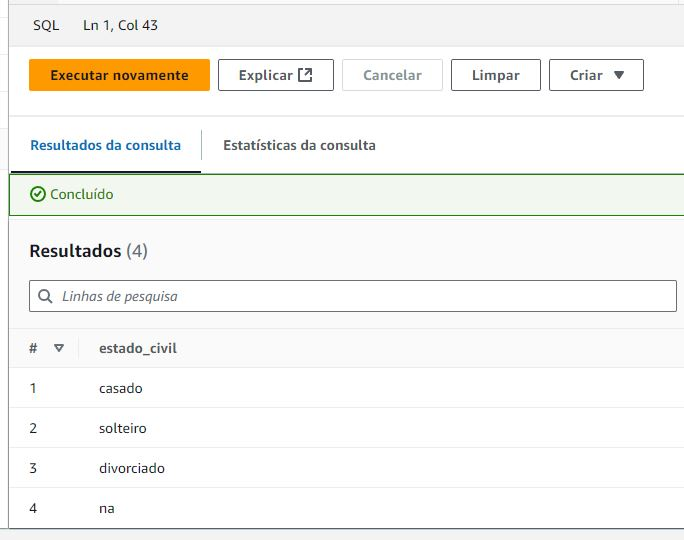

* Quais são os tipos de salário anual disponíveis no banco de dados?

 **Query:** SELECT DISTINCT salario_anual FROM credito;





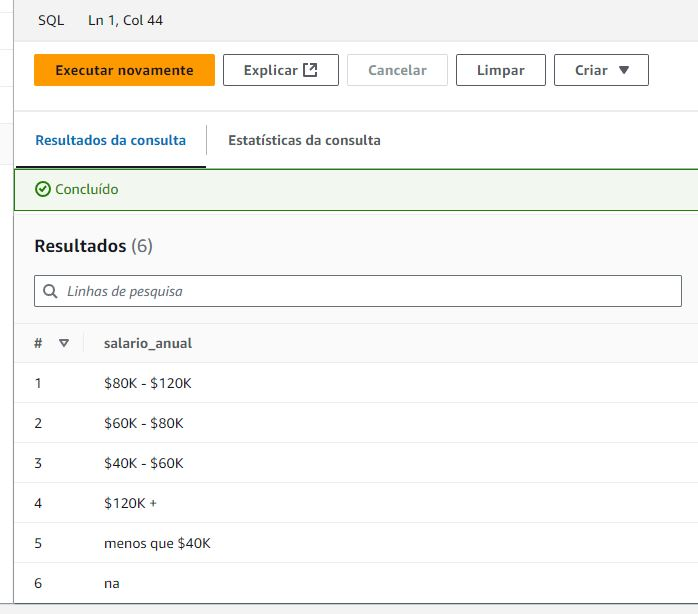

**Obs:** Os salários não estão sendo expostos com o valor exato que cada cliente recebe. O que temos é a faixa salarial de cada um.



* Quantas Mulheres e Homens fazem parte deste grupo de clientes?

 **Query:** SELECT COUNT(*), sexo FROM credito GROUP BY sexo

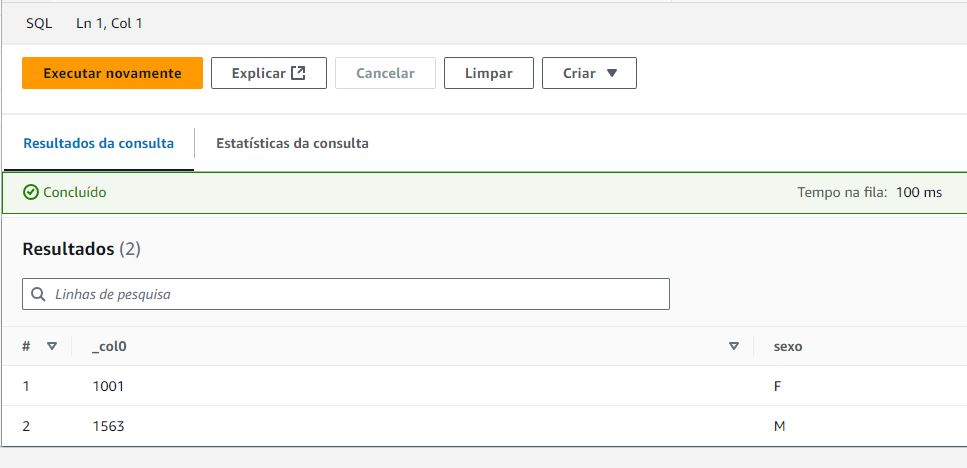

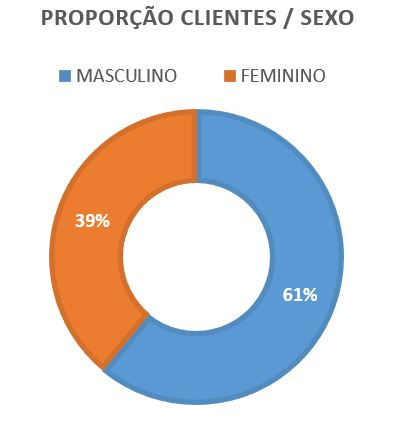

**Obs:** Aqui é possível observar que a maioria dos clientes são do sexo Masculino.

* Quais são os tipos de planos dos cartões disponíveis e quantos clientes estão em cada plano?

 **Query:** SELECT COUNT(*), tipo_cartao FROM credito GROUP BY tipo_cartao;

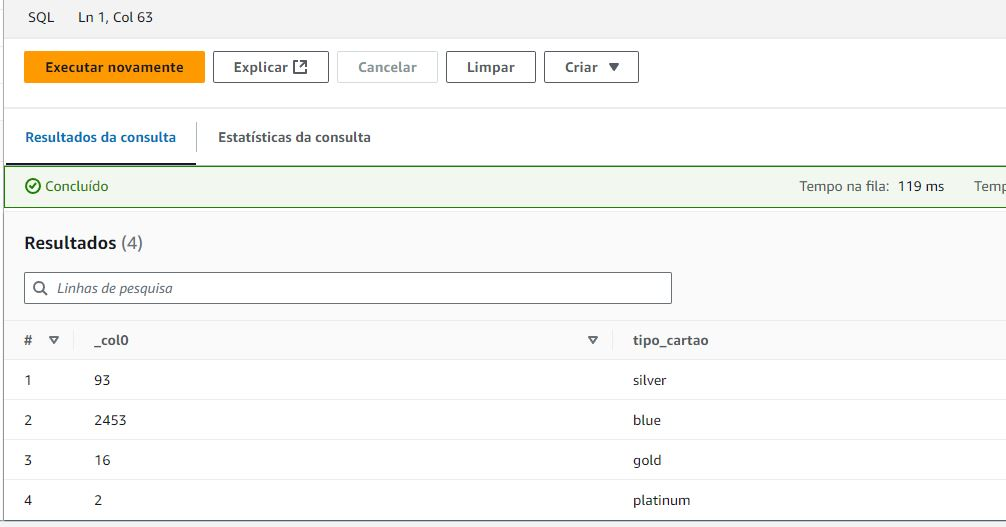

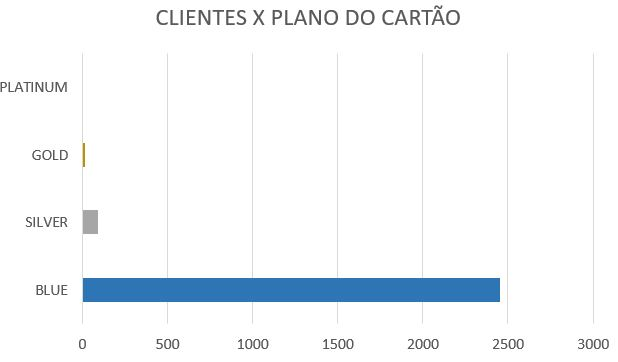

**Obs:** O plano **Blue** é o plano de maior adesão.

* Qual a idade máxima, mínima e a média por sexo?

 **Query:** SELECT AVG(idade) as media_idade, MIN(idade) as min_idade, MAX(idade) as max_idade, sexo

 FROM credito

 GROUP BY sexo;

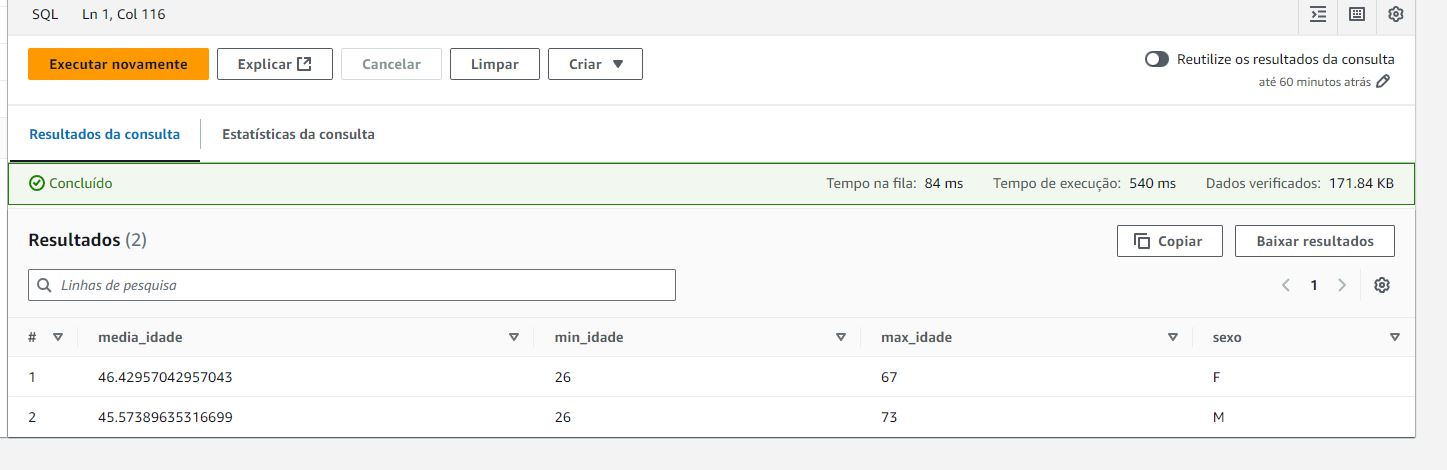

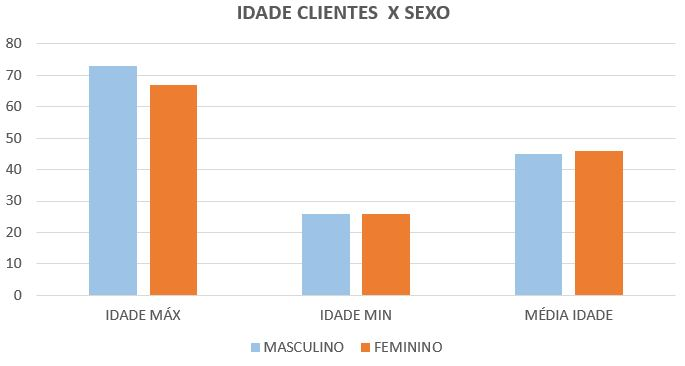

**Obs:** Por meio desta análise não foi possível extrair nenhuma informação relevante. **A menor idade dos dois sexos é a mesma**, a **diferença da idade máxima é muito pequena, o que torna as médias muito proximas**.

# **Cruzamento das informações:**
Agora que ja conhecemos algumas características do dataset vamos cruzar algumas informações em busca de padrões.

* Entender e analisar a relação entre sexo e faixa salário:


**Query**: SELECT salario_anual, sexo, count(salario_anual) from credito

group by salario_anual, sexo
      
order by salario_anual;

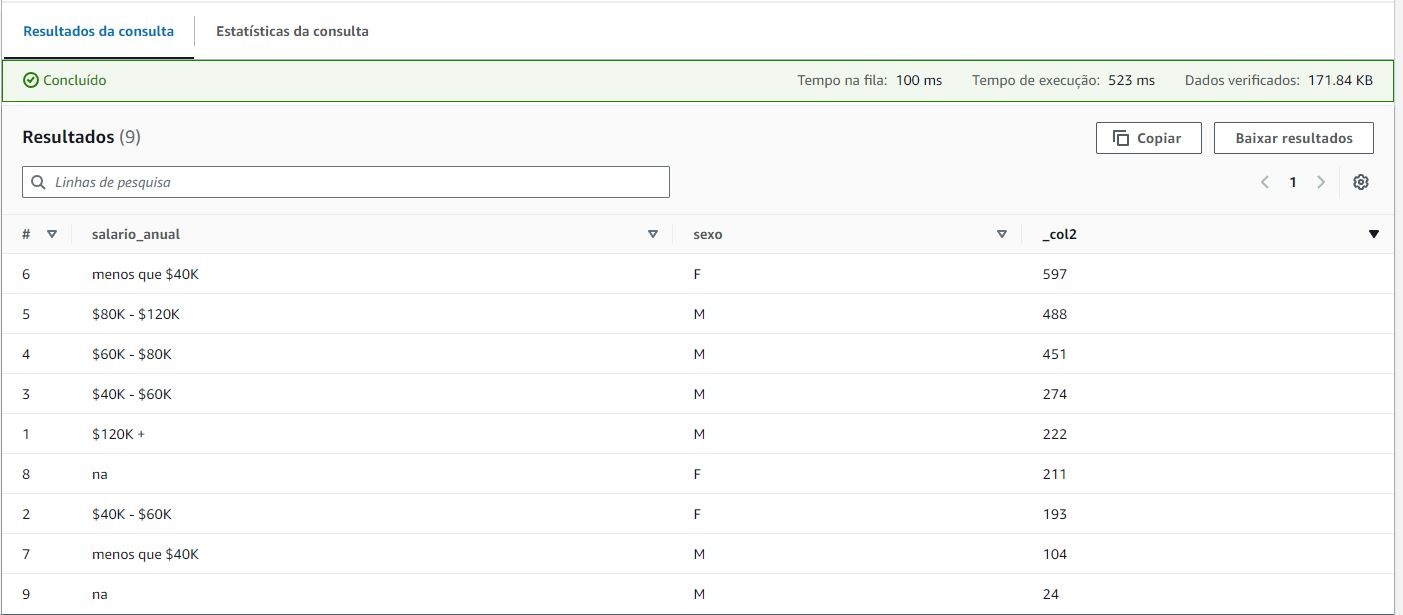

**Obs:** A maioria dos clientes possui **um renda menor que 40.000**.

Existem **211** clientes do sexo Feminino e **24** do sexo Masculino que **NÃO** sabemos a faixa salarial.

**Não há registros de mulheres** nas faixas salariais **acima de 60.000**.

De certa forma, pode ser interessante para a empresa focar no público Feminino com renda abaixo de 40.000 para **atrair novas clientes**.

* Quais as características dos clientes que possuem os maiores creditos?

 **Query:** SELECT max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito


  WHERE escolaridade != 'na' and tipo_cartao != 'na'

 GROUP BY escolaridade, tipo_cartao, sexo

 ORDER BY limite_credito desc

 limit 10;

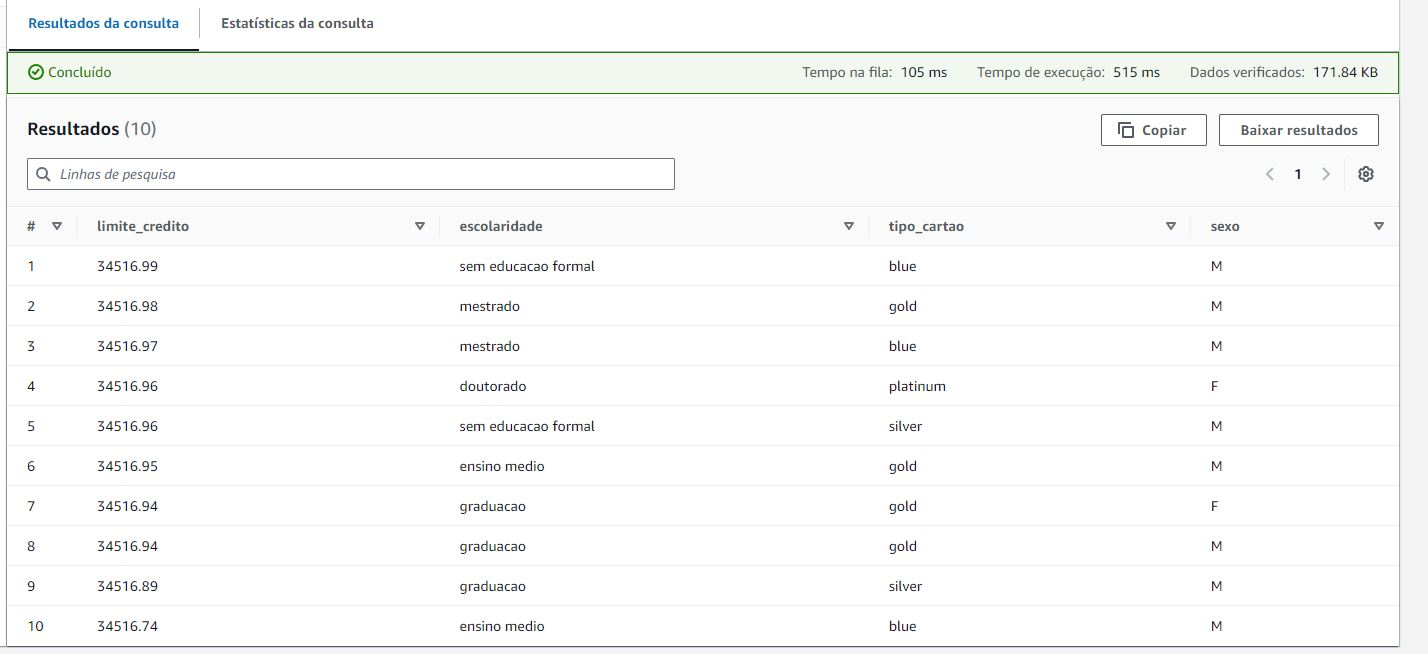

**Obs:** Nesta análise, percebe-se que quem tem **maiores créditos** está **classificado sem uma escolaridade formal.**

**A escolaridade parece não ter impacto neste quesito**. Talvez o tempo que o cliente está fidelizado neste banco tenha mais relevância.

O limite mais alto é oferecido para homens sem educação formal.

**O cartão também parece não estar relacionado com a escolaridade** nem com o limite. Dentre os maiores limites, encontramos clientes com todas as bendeiras de cartão: gold, silver, platinum e blue.

* Quais as características dos clientes que possuem os menores creditos?

 **Query:** SELECT MAX (limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo FROM credito

 WHERE escolaridade != 'na' and tipo_cartao != 'na'

 GROUP BY escolaridade, tipo_cartao, sexo

 ORDER BY limite_credito asc

 limit 10;

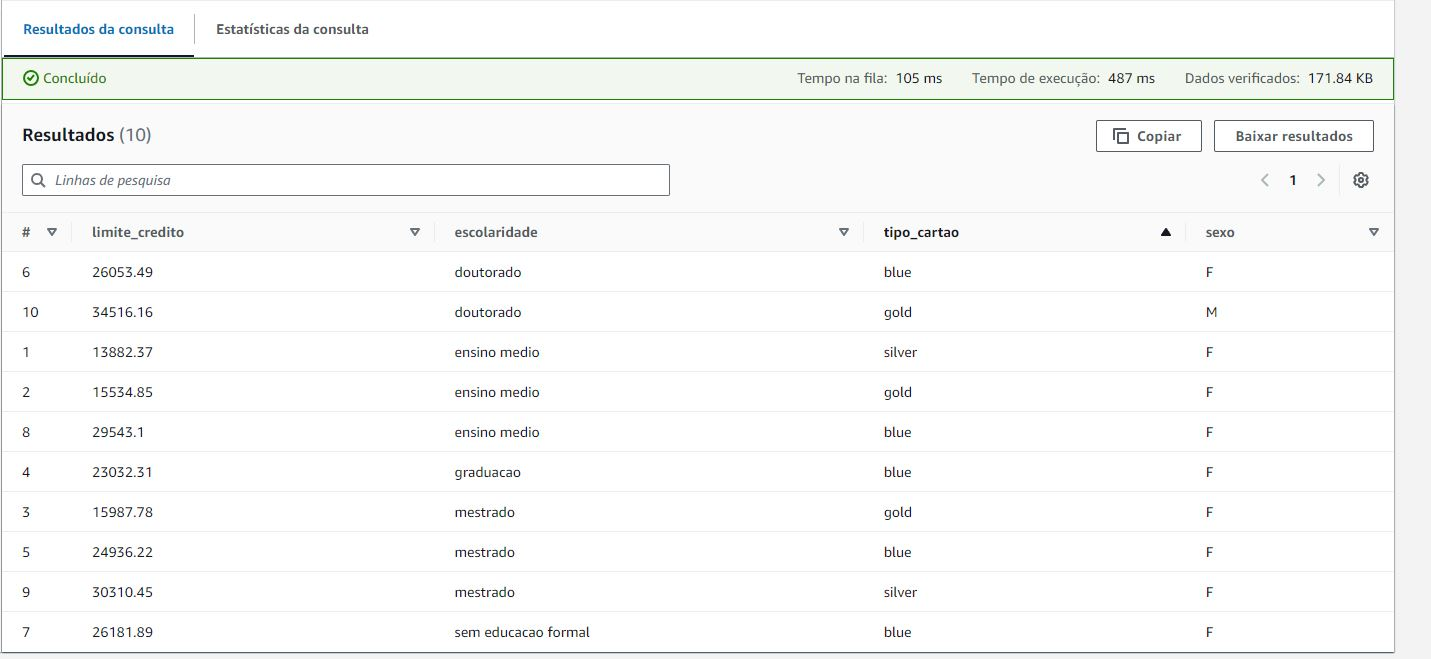

**Obs:** Dessa vez conseguimos perceber que **não há clientes com cartão platinum dentre os menores limites.**

Também foi possível perceber que **a maioria dos limites mais baixos são mulheres enquanto nos maiores limites predominam os homens.**

* Quais as características dos clientes que gastam mais?

 **Query:** SELECT MAX(valor_transacoes_12m) as maior_valor_gasto, AVG(valor_transacoes_12m) as media_valor_gasto, MIN(valor_transacoes_12m) as min_valor_gasto, sexo

 FROM credito

 GROUP BY sexo;

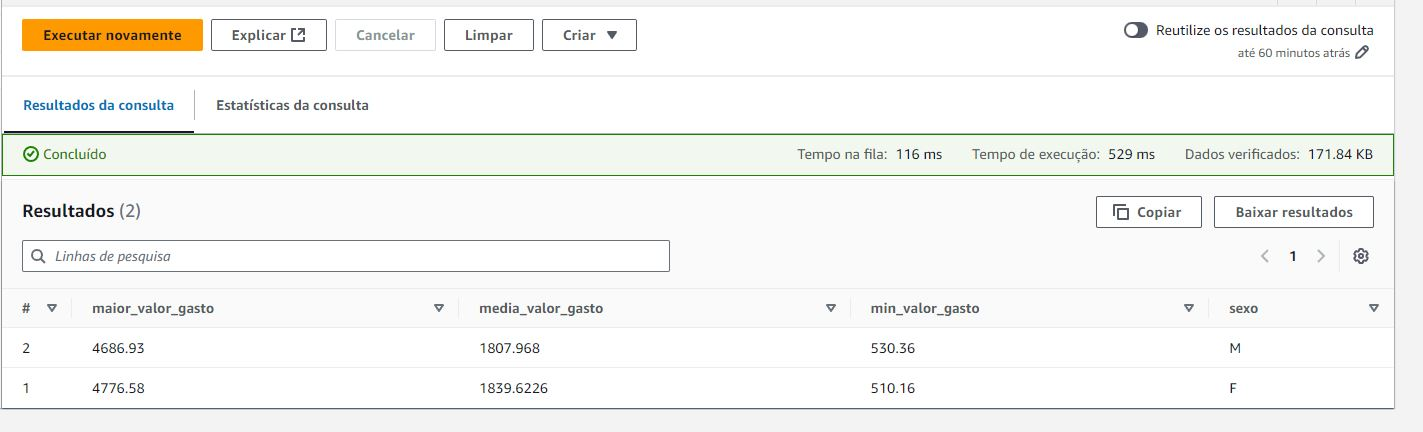

**Obs:** Apesar da diferença nos limites, os gastos de homens e mulheres são similares.


* A faixa salarial impacta no limite?

 **Query:**  SELECT AVG(qtd_produtos) as qts_produtos, AVG(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual

 FROM credito WHERE salario_anual != 'na'

 GROUP BY sexo, salario_anual

 ORDER BY AVG(valor_transacoes_12m) desc;

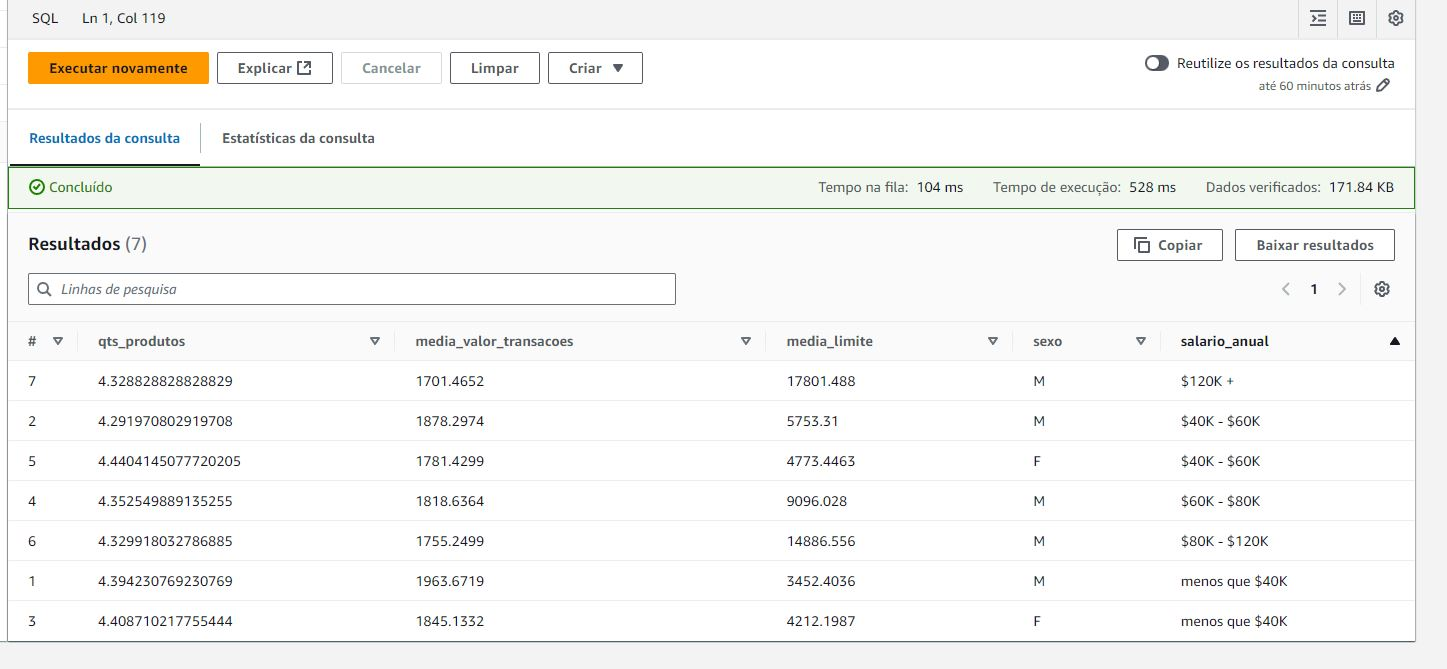

**Obs:** Aqui podemos observar que **as pessoas que tem a menor faixa salarial também apresentam o menor limite de credito**. Diferentemente da escolaridade.

# **Conclusão**
 Alguns insights obtidos que podemos pontuar:

* A maior parte dos clientes possui renda de até 40.000;
* O plano de maior adesão disparado é o Blue;
* Apenas 2 clientes estão no plano Platinum;
* A maioria dos clientes são do sexo Masculino;
* Dentre os menores limites não há presença de cartão Platinum;
* Os clientes com maiores limites são homens, e com menores limites são as mulheres;
* A faixa salarial impacta diretamente no limite de crédito;
* Não existem clientes com salário anual acima de 60.000 do sexo Feminino;
* O grau de escolaridade parece não influenciar significativamente nos gastos, nos limites e tipo de cartão dos clientes;
* A idade média dos clientes em cada categoria de sexo fica entre 44 e 46 anos;

Através destes resultados podemos concluir que se trata de um banco tradicional que prioriza seus clientes mais antigos e reflete um problema cultural da sociedade na diferença entre Homens e Mulheres.

Talvez o foco aqui seria trazer novas clientes do sexo Feminino e buscar abranger seus clientes em todas as bandeiras oferecidas dos cartões.